<a href="https://colab.research.google.com/github/jongyun3300/IT-BUSINESS-INNOVATION/blob/main/data_visualization_health_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##0. 데이터 불러오기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ITB_22/ITB_data/health_data.csv', encoding='utf-8')

In [ ]:
data.columns

Index(['가입자일련번호', '시도코드', '성별코드', '연령대코드(5세단위)', '신장(5Cm단위)', '체중(5Kg 단위)',
       '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압', '이완기혈압',
       '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소',
       '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태', '음주여부',
       '구강검진수검여부', '치아우식증유무', '치석'],
      dtype='object')

## 1. 연령대별 고지혈증 환자와 당뇨 환자의 비교


In [ ]:
#고지혈증 = 총콜레스테롤 240mg/dl, 중성지방 200mg/dl, LDL콜레스테롤 160mg/dl 이상인 경우
#당뇨 = 공복혈당 126 mg/dL 이상인 경우

In [ ]:
H1=data[['식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'LDL콜레스테롤','연령대코드(5세단위)']]

In [ ]:
import numpy as np
H1['BM'] = np.where(H1['식전혈당(공복혈당)']>=126, 1, 0)
H1['BM']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0       0
1       0
2       0
3       1
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: BM, Length: 10000, dtype: int64

In [ ]:
H1['HL'] = np.where((H1['총콜레스테롤']>=240) | (H1['트리글리세라이드']>=200) | (H1['LDL콜레스테롤']>=160), 1, 0)
H1['HL']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: HL, Length: 10000, dtype: int64

In [ ]:
H1.rename (columns = {'연령대코드(5세단위)':'Age'},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
H1_f=H1[['BM','HL','Age']]

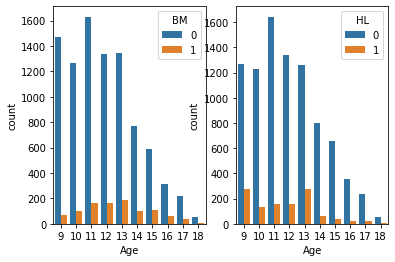

In [186]:
plt.tight_layout()

plt.subplot(1, 2, 1)
sns.countplot(data=df, x=H1_f['Age'], hue=H1_f["BM"])

plt.subplot(1, 2, 2)
sns.countplot(data=df, x=H1_f['Age'], hue=H1_f["HL"])

plt.show()

우선 공복혈당으로 당뇨여부를 확인하고, 총콜레스테롤, 트리글리세라이드, LDL콜레스테롤 수치를 통해서 고지혈증 여부를 파악할 수 있다. 이를 통해서 당뇨는 BM, 고지혈증은 HL로 데이터를 전처리 하였고, 이를 그래프로 나타내었디. 다만, 원래는 "hue"에 해당하는 값에 당뇨에 해당하는 BM 1 값과 HL 1 값을 삽입하고자 하였으나 이 부분은 역량 부족으로 하나의 그래프로 나타내지는 못하였다. 상기 그래프를 통해서 연령대에 띠라서 비교적 완만하게 진행되는 당뇨와 달리 고지혈증은 40세의 젊은 나이에서도 많이 발병되고 있으며, 당뇨에 비해 고지혈증 환자수가 많은 것 또한 확인할 수 있다. 이를 통해서 당수치보다 콜레스테롤 수치는 더 일찍부터 관리가 필요하다는 것도 예측할 수 있다.

## 2. 음주여부와 간수치(혈청크레아티닌,AST,ALT)의 상관관계

In [ ]:
H2_X=data[['혈청크레아티닌','(혈청지오티)AST', '(혈청지오티)ALT']]

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler1=StandardScaler()

In [ ]:
scaler1.fit(H2_X)

StandardScaler()

In [ ]:
H2_X_scaled1=scaler1.transform(H2_X)

In [ ]:
H2_X_scaled=pd.DataFrame(H2_X_scaled1)

In [ ]:
H2_X_scaled.columns=['CREATININE','SGOT_AST', 'SGPT_ALT']

In [ ]:
H2_X_scaled

,CREATININE,SGOT_AST,SGPT_ALT
0,0.835611,-0.368484,0.008854
1,-1.157765,-0.536236,-0.496739
2,-0.493306,-0.032980,-0.075411
3,1.167841,2.091882,2.958149
4,-0.493306,-0.536236,-0.412474
...,...,...,...
9995,-0.493306,-0.424401,-0.243942
9996,-0.493306,-0.200732,-0.201810
9997,0.503382,-0.312567,0.008854
9998,0.503382,-0.088897,-0.117544


In [ ]:
H2_y=data[['음주여부']]

In [ ]:
H2_y.columns=['DRINK']

In [ ]:
H2_y['DRINK'] = H2_y['DRINK'].replace(['No','Yes'], [0,1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
H2_f=pd.concat([H2_X_scaled, H2_y], axis=1)

In [ ]:
H2_f

,CREATININE,SGOT_AST,SGPT_ALT,DRINK
0,0.835611,-0.368484,0.008854,0.0
1,-1.157765,-0.536236,-0.496739,0.0
2,-0.493306,-0.032980,-0.075411,0.0
3,1.167841,2.091882,2.958149,0.0
4,-0.493306,-0.536236,-0.412474,0.0
...,...,...,...,...
9995,-0.493306,-0.424401,-0.243942,1.0
9996,-0.493306,-0.200732,-0.201810,1.0
9997,0.503382,-0.312567,0.008854,0.0
9998,0.503382,-0.088897,-0.117544,0.0


In [ ]:
corr_df = H2_f.corr()
corr_df = corr_df.apply(lambda x: round(x ,2))
corr_df

,CREATININE,SGOT_AST,SGPT_ALT,DRINK
CREATININE,1.00,0.03,0.06,0.07
SGOT_AST,0.03,1.00,0.80,0.04
SGPT_ALT,0.06,0.80,1.00,0.07
DRINK,0.07,0.04,0.07,1.00


In [ ]:
s = corr_df.unstack()

In [ ]:
df = pd.DataFrame(s[s < 1].sort_values(ascending=False), columns=['corr'])
df.style.background_gradient(cmap='viridis')

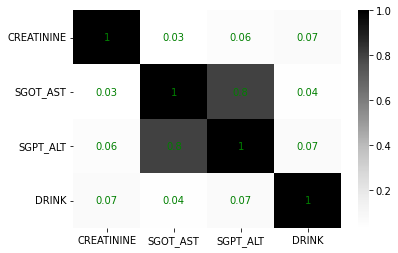

In [ ]:
ax = sns.heatmap(corr_df, annot=True, annot_kws=dict(color='g'), cmap='Greys')
plt.show()

위의 데이터는 음주여부와 간수치 간의 상관관계를 알아보기 위해서 시각화를 진행했다.
혈액검사에서 간기능을 나타내는 혈청크레아티닌, 혈청지오티AST, 혈청지오티ALT 수치는 연속형으로 주어져 데이터 전처리로 정규화 과정을 거쳤다. 상관관계 분석 이후 데이터프레임의 style 프로퍼티를 사용하여 간단하게 시각화했다. 이후 seaborn을 사용하여 heatmap을 그렸다. 음주여부인 Drink와 다른 요소들을 비교해보면, AST와 ALT는 비교적 높은 수치를 나타냈으나 수치가 0.07로 명확한 상관관계가 존재한다고 보기는 어렵다. 다만, ALT와 AST 수치는 0.8로 높은 관계성을 확인할 수 있었으며, 이에 따라서 ALT 혹은 AST 수치가 높다면 다른 하나도 높을 것으로 예측할 수 있을 것이다.


##3. 비만평가의 일종인 BMI와 WHtR의 비교

In [ ]:
 # 비만도 BMI = kg/m제곱
 # 허리-신장 비율 WHtR = inch/키 (1inch=2.54cm)

In [187]:
H3=data[['신장(5Cm단위)', '체중(5Kg 단위)','허리둘레','성별코드']]

In [188]:
H3['BMI'] =H3['체중(5Kg 단위)']/(H3['신장(5Cm단위)']/100)**2
H3['BMI']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0       22.038567
1       28.888889
2       22.892820
3       27.343750
4       20.811655
          ...    
9995    22.892820
9996    21.484375
9997    31.250000
9998    22.892820
9999    29.296875
Name: BMI, Length: 10000, dtype: float64

In [189]:
H3['WHtR']= H3['허리둘레']/2.54/H3['신장(5Cm단위)']
H3['WHtR']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0       0.172035
1       0.212598
2       0.177800
3       0.223425
4       0.191008
          ...   
9995    0.210820
9996    0.190699
9997    0.228839
9998    0.198120
9999    0.246063
Name: WHtR, Length: 10000, dtype: float64

In [194]:
H3.rename (columns = {'성별코드':'Gender'},inplace=True)

In [196]:
H3_X=H3[['BMI','WHtR']]

In [195]:
H3_y=H3[['Gender']]

In [197]:
scaler1=StandardScaler()
scaler1.fit(H3_X)
H3_X_scaled1=scaler1.transform(H3_X)
H3_X_scaled=pd.DataFrame(H3_X_scaled1)
H3_X_scaled.columns=['BMI','WHtR']
H3_X_scaled

,BMI,WHtR
0,-0.620949,-1.303360
1,1.343200,0.480520
2,-0.376015,-1.049825
3,0.900172,0.956659
4,-0.972734,-0.468964
...,...,...
9995,-0.376015,0.402327
9996,-0.779849,-0.482578
9997,2.020187,1.194728
9998,-0.376015,-0.156193


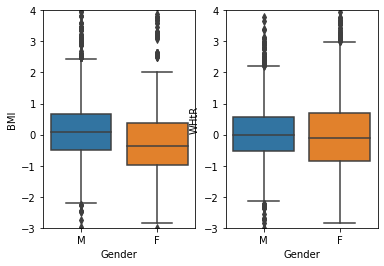

In [215]:
plt.tight_layout()

plt.subplot(1, 2, 1)
plt.ylim([-3, 4])
sns.boxplot(y = H3_X_scaled['BMI'], x = H3_y['Gender'])

plt.subplot(1, 2, 2)
plt.ylim([-3, 4])
sns.boxplot(y = H3_X_scaled['WHtR'], x = H3_y['Gender'])

plt.show()

체중을 기반으로 비만정도를 측정하는 BMI 지수와 함께 허리둘레로 비만정도를 측정하는 WHtR 지수를 비교하고자 하였다. 신장(5Cm단위),체중(5Kg 단위),허리둘레의 데이터를 활용하여 비만지수를 측정하였고 성별을 기준으로 박스플롯으로 시각화를 진행했다. 전반적으로 중앙값이 BMI는 남성이 여성보다 조금 더 높은 형태를 보였지만, WHtR 지수는 남성과 여성의 큰 차이가 보이지 않았다. WHtR은 최솟값과 최댓값의 범위가 BMI에 비교해서 더 넓게 분포되어 있다. 개개인별의 편차가 좀 더 큰 WHtR이 조금 더 넓은 범위의 비만도를 잘 커버했다고 해석할 수도 있을 것이다.